Try and find two catgeories that can be combined.

In [1]:
from pathlib import Path
# Load the softmax encodings of the data

from sisap2023.similarity import load_mf_encodings, load_mf_softmax

# Load the data

data = load_mf_encodings(Path("/Volumes/Data/mf_resnet50")) # load encodings

sm = load_mf_softmax(Path('/Volumes/Data/mf_softmax'))

from sisap2023.similarity import l1_norm

data = l1_norm(data)


In [ ]:
import numpy as np
np.sum(data,axis=1)

(10, 1000)


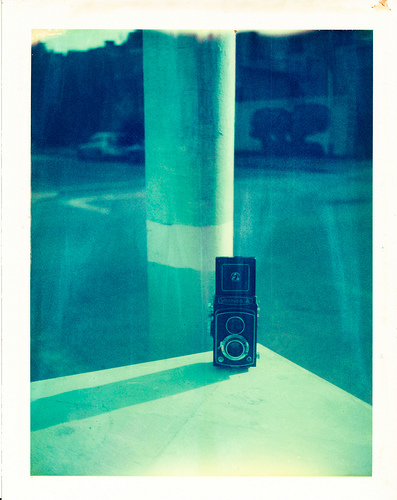

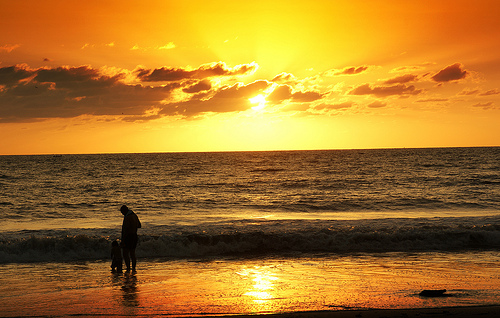

In [2]:
from sisap2023.count_cats import get_best_cat_index
from sisap2023.similarity import get_mf_image

# subtract 1 from the file numbers

category_1 = 446;
category_2 = 978;

indexes_for_cat1 = get_best_cat_index(category_1,sm)
indexes_for_cat2 = get_best_cat_index(category_2,sm)

cat_1_image_rep = data[indexes_for_cat1[0:10]]
cat_2_image_rep = data[indexes_for_cat2[0:10]]

print( cat_1_image_rep.shape )

display(get_mf_image(indexes_for_cat1[0]))
display(get_mf_image(indexes_for_cat2[0]))


In [3]:
from sisap2023.msedOO import msedOO
import numpy as np


poly_query_data = np.vstack((cat_1_image_rep,cat_2_image_rep))

print( poly_query_data.shape )

base = msedOO(poly_query_data)  # form the base simplex


(20, 1000)


/Users/al/repos/sisap2023-pytorch/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


In [4]:
combined_dists_2 =  base.msed(data)
combined_dists_2 = combined_dists_2.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(combined_dists_2)     # lowest is first
top_100 = indices[0:100]


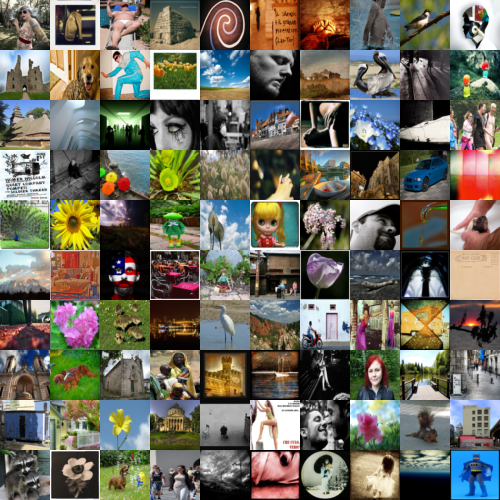

In [5]:
from sisap2023.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)